In [4]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations
from collections import defaultdict
from networkx.algorithms import community
import networkx.algorithms.community as nxcom
from networkx.algorithms.community import greedy_modularity_communities

In [5]:
#reading the network with the argument "create_using=nx.DiGraph()"" 
H = nx.read_adjlist('Exercise 3 twitter_data_to_use_in_exam.csv', delimiter=",", create_using=nx.DiGraph())
H.remove_node("") #removing the index because it is considered as a node by the function

In [7]:

print(len(H.edges()))
print(len(H.nodes()))

30677
491


Number of neighbors for company_x

In [357]:
print("Company_x has",len(list(H.neighbors("company_x"))),"neighbors")
print("This is the degree of company_x is",H.degree("company_x"))

Company_x has 280 neighbors
This is the degree of company_x is 399


Degree Centrality of network H

In [358]:
deg_cent={k: v for k, v in sorted(nx.degree_centrality(H).items(), key=lambda item: item[1],reverse=True)}
#print(deg_cent)
print(sorted(deg_cent, key=deg_cent.get, reverse=True)[:10])
print(deg_cent["company_x"])

['corn_acacia', 'company_x', 'dollar_lily', 'parmesan_holly', 'blood_basil', 'linen_milkwort', 'cotton_hedysarum', 'ruby_bugloss', 'parmesan_helenium', 'coconut_lavender']
0.8142857142857144


Betweenness Centrality of network H

In [359]:
bet_cent={k: v for k, v in sorted(nx.betweenness_centrality(H).items(), key=lambda item: item[1],reverse=True)}
#print(bet_cent)
print(sorted(bet_cent, key=bet_cent.get, reverse=True)[:10])
print(bet_cent["company_x"])

['parmesan_holly', 'lace_broom', 'canary_lily', 'ruby_meadowsweet', 'clay_hedysarum', 'corn_acacia', 'company_x', 'ruby_manchineel', 'beige_burdock', 'dollar_lily']
0.016466717945649568


Eigen Vector Centrality

In [360]:
eigen_cent=nx.eigenvector_centrality(H)
#the top ten
eigenlist=sorted(eigen_cent, key=eigen_cent.get, reverse=True)[:10]    
print(eigenlist)
eigen_cent["company_x"]
eigen_vector={k: v for k, v in sorted(eigen_cent.items(), key=lambda item: item[1],reverse=True)}
#print(eigen_vector)

['porcelain_mugwort', 'cotton_hedysarum', 'dollar_lily', 'corn_acacia', 'coconut_lavender', 'candy_hyacinth', 'parmesan_helenium', 'squash_milfoil', 'hazelwood_marigold', 'linen_milkwort']


CLUSTERING COEFFICIENCT IN NETWORK H

In [361]:
clust_cof= nx.clustering(H)

In [362]:
{k: v for k, v in sorted(clust_cof.items(), key=lambda item: item[1],reverse=True)}

{'dijon_foxglove': 0.7866666666666666,
 'currant_basil': 0.7091743119266055,
 'blood_mezereon': 0.6703096539162113,
 'frost_acacia': 0.6359945872801083,
 'salt_myrtle': 0.6267605633802817,
 'shortbread_laurel': 0.61307824100514,
 'shortbread_hollyhock': 0.6126152073732719,
 'ivory_foxglove': 0.6084788029925187,
 'jam_marshmallow': 0.6025241508258025,
 'scarlet_honesty': 0.5960223741454319,
 'dollar_larkspur': 0.5865791701947503,
 'sandcastle_madder': 0.5842615012106538,
 'blonde_honesty': 0.5817858553931252,
 'carrot_mandrake': 0.5802199457667973,
 'blush_hollyhock': 0.560880829015544,
 'ruby_honeysuckle': 0.5518617021276596,
 'honey_mezereon': 0.5516448532012734,
 'macaroon_bugloss': 0.5501089324618736,
 'dijon_hollow': 0.5494802494802494,
 'mustard_myrtle': 0.5470284237726099,
 'rice_mistletoe': 0.5440596846846847,
 'daffodil_meadow': 0.5436351706036745,
 'carrot_acacia': 0.5377747252747253,
 'spice_mezereon': 0.537122969837587,
 'canary_helenium': 0.5350404312668463,
 'daisy_bryony'

In [363]:
clustering={k: v for k, v in sorted(clust_cof.items(), key=lambda item: item[1],reverse=True)}


In [364]:
sorted(clust_cof, key=clust_cof.get, reverse=True)[:5]

['dijon_foxglove',
 'currant_basil',
 'blood_mezereon',
 'frost_acacia',
 'salt_myrtle']

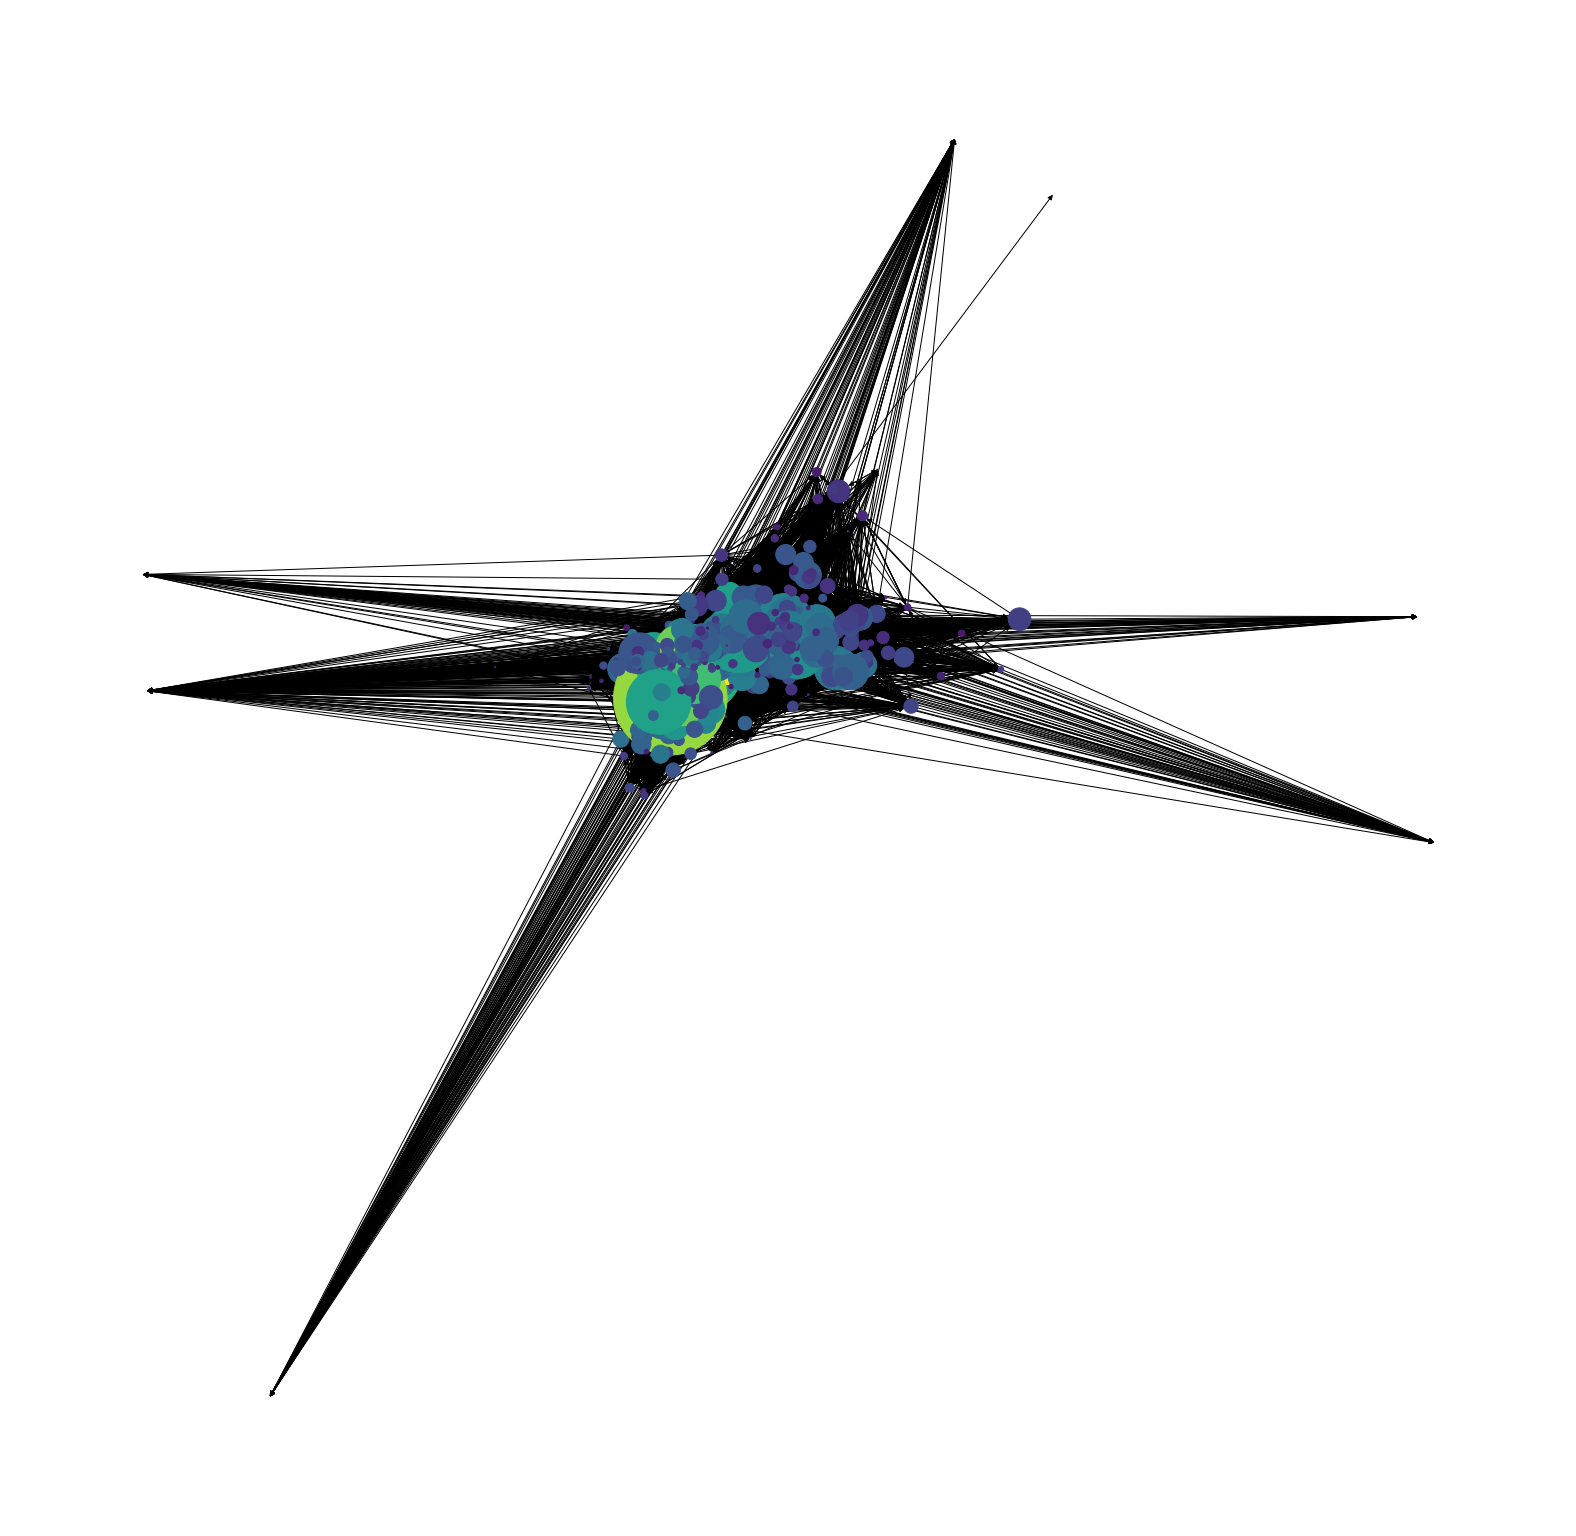

In [511]:
pos = nx.spring_layout(H)
betCent = nx.betweenness_centrality(H, normalized=True)
node_color = [20000.0 * H.degree_centrality(v) for v in H]
node_size =  [v * 200000 for v in betCent.values()]
plt.figure(figsize=(28,28))
nx.draw_networkx(H, pos=pos, with_labels=False,
                 node_color=node_color,
                 node_size=node_size )
plt.axis('off')
plt.savefig('books_read.png')

# COMMUNITITES  GRAPH

In [405]:
G = nx.read_adjlist('Exercise 3 twitter_data_to_use_in_exam.csv', delimiter=",")
NG=nx.to_directed(G)
com=nxcom.greedy_modularity_communities(nx.Graph(H))

In [475]:
com = []
for communities in list(nxcom.greedy_modularity_communities(nx.Graph(H))):
    com.append(communities)
print("Number of communities is",len(com)) 
type(com)

Number of communities is 3


list

In [434]:
for lilcom in com:
    comlist=[]
    for i in lilcom:
        if H.has_edge(i,"company_x")== True:
            comlist.append(i)
    print("this is the length of community",len(lilcom),len(comlist)/len(lilcom))
            
            
            
            

this is the length of community 278 0.38848920863309355
this is the length of community 211 0.052132701421800945
this is the length of community 2 0.0


In [436]:
largest_com=sorted(list(nxcom.greedy_modularity_communities(nx.Graph(H))),key=lambda x: len(x))[-1]
print(len(largest_com))

278


Length of the second largest community 

In [459]:
largest_com2=sorted(list(nxcom.greedy_modularity_communities(nx.Graph(H))),key=lambda x: len(x))[-2]
print(len(largest_com3))


211


In [460]:
#S_com is the subgraph of the third largest community of 211 nodes
VS_com=H.subgraph(largest_com2)

In [461]:
#L_com is the subgraph of the largest community of 278 nodes
L_com=H.subgraph(largest_com)

# Analysis of L_com

In [471]:
deg_cent_L=nx.degree_centrality(L_com)

In [472]:
{k: v for k, v in sorted(nx.degree_centrality(L_com).items(), key=lambda item: item[1],reverse=True)}

{'corn_acacia': 1.4332129963898919,
 'dollar_lily': 1.2851985559566788,
 'blood_basil': 1.2093862815884477,
 'company_x': 1.1660649819494586,
 'linen_milkwort': 1.1588447653429603,
 'coconut_lavender': 1.144404332129964,
 'corn_lichen': 1.1299638989169676,
 'cotton_hedysarum': 1.1227436823104693,
 'ruby_bugloss': 1.1010830324909748,
 'parmesan_helenium': 1.0902527075812274,
 'eggshell_aloe': 1.0108303249097472,
 'marmalade_bluebottle': 0.9891696750902528,
 'parmesan_holly': 0.9855595667870036,
 'honey_fieldrush': 0.9675090252707581,
 'squash_holly': 0.9638989169675091,
 'porcelain_blackthorn': 0.9602888086642599,
 'parchment_marshmallow': 0.9458483754512635,
 'linen_fig': 0.9133574007220217,
 'white_mandrake': 0.9025270758122744,
 'apple_bugloss': 0.8844765342960289,
 'blush_fennel': 0.8628158844765343,
 'hazelnut_mandrake': 0.8555956678700362,
 'corn_mandrake': 0.8303249097472925,
 'porcelain_mugwort': 0.8267148014440433,
 'bone_fennel': 0.8231046931407943,
 'jam_hyacinth': 0.81588447

In [476]:
#{k: v for k, v in sorted(nx.betweenness_centrality(L_com).items(), key=lambda item: item[1],reverse=True)}

Closeness centrality

In [478]:
#{k: v for k, v in sorted(nx.closeness_centrality(L_com).items(), key=lambda item: item[1],reverse=True)}

BETWEENNESS DEGREE CENTRALITY

In [477]:
bet_cent_L=nx.betweenness_centrality(L_com)
sorted(bet_cent_L, key=bet_cent_L.get, reverse=True)


['corn_acacia',
 'dollar_lily',
 'company_x',
 'coconut_lavender',
 'corn_lichen',
 'blood_basil',
 'ruby_bugloss',
 'cotton_hedysarum',
 'marmalade_bluebottle',
 'linen_milkwort',
 'parchment_marshmallow',
 'parmesan_helenium',
 'corn_mandrake',
 'parmesan_holly',
 'linen_fig',
 'hazelnut_mandrake',
 'white_mandrake',
 'honey_fieldrush',
 'porcelain_blackthorn',
 'lace_broom',
 'rice_aloe',
 'eggshell_aloe',
 'jam_hyacinth',
 'banana_marshmallow',
 'banana_honeysuckle',
 'apple_bugloss',
 'spice_hogbean',
 'wine_arum',
 'sangria_mezereon',
 'banana_hollyhock',
 'rose_acanthus',
 'yam_blackthorn',
 'oat_arum',
 'squash_holly',
 'orange_broom',
 'blood_laburnum',
 'blonde_acacia',
 'blush_fennel',
 'granola_bryony',
 'carrot_milkwort',
 'porcelain_mugwort',
 'biscotti_blackthorn',
 'bone_fennel',
 'buttermilk_blackthorn',
 'canary_larkspur',
 'berry_helenium',
 'carrot_lucerne',
 'buttermilk_milfoil',
 'hazelwood_marigold',
 'rice_ash',
 'oyster_myrtle',
 'apricot_aloe',
 'oat_hepatica'

DEGREE CENTRALITY

In [453]:
L= sorted(deg_cent_L, key=deg_cent_L.get, reverse=True)


# Analysis of VS_com

#using the check function for whether a node follows the company_x node 
#and choose the one eith the highest degree_centrality

In [489]:
#degree centrality
deg_cent_VS=nx.degree_centrality(VS_com)
#betweeness centralitry
bet_cent_VS=nx.betweenness_centrality(VS_com)
close_VS=nx.closeness_centrality(VS_com)
hits_VS=nx.hits(VS_com)

BETWEENESS CENTRALITY

In [480]:
sorted(bet_cent_VS, key=bet_cent_VS.get, reverse=True)[:10]

['canary_lily',
 'beige_burdock',
 'ruby_acacia',
 'ruby_manchineel',
 'butterscotch_borage',
 'lemon_manchineel',
 'sangria_bugloss',
 'dandelion_milkwort',
 'merlot_manchineel',
 'lace_motherwort']

In [465]:
nx.average_clustering(VS_com)

0.3572667980520291

DEGREE CANTRALITY

In [481]:
VS=sorted(deg_cent_VS, key=deg_cent_VS.get, reverse=True)[:10]
print(VS)

['beige_burdock', 'butterscotch_borage', 'lemon_manchineel', 'flaxen_blackthorn', 'chiffon_fieldrush', 'beige_madder', 'yam_bluebottle', 'eggnog_holly', 'rose_hedysarum', 'rose_lilac']


Closenness

In [484]:
sorted(close_VS, key=close_VS.get, reverse=True)[:10]

['medallion_amaranth',
 'dandelion_milkwort',
 'biscotti_bramble',
 'sugarcookie_bugloss',
 'flaxen_hedysarum',
 'rice_hollyhock',
 'brick_mezereon',
 'parmesan_lily',
 'granola_motherwort',
 'amber_bluebottle']

In [479]:
{k: v for k, v in sorted(nx.closeness_centrality(VS_com).items(), key=lambda item: item[1],reverse=True)}

{'medallion_amaranth': 0.641285403050109,
 'dandelion_milkwort': 0.6209915611814346,
 'biscotti_bramble': 0.6151515151515151,
 'sugarcookie_bugloss': 0.5946464646464646,
 'flaxen_hedysarum': 0.5840277777777777,
 'rice_hollyhock': 0.577156862745098,
 'brick_mezereon': 0.577156862745098,
 'parmesan_lily': 0.5754643206256109,
 'granola_motherwort': 0.5737816764132554,
 'amber_bluebottle': 0.572108843537415,
 'pearl_heath': 0.5704457364341086,
 'tan_lucerne': 0.5671483622350675,
 'beige_madder': 0.5655139289145054,
 'yellow_amaranth': 0.5638888888888889,
 'biscotti_aloe': 0.5590693257359924,
 'garnet_fennel': 0.5590693257359924,
 'spice_fennel': 0.5574810606060606,
 'merlot_manchineel': 0.554331450094162,
 'red_honesty': 0.5527699530516432,
 'rose_hibiscus': 0.5512172284644195,
 'yam_bluebottle': 0.549673202614379,
 'lemon_manchineel': 0.5481378026070763,
 'sand_hepatica': 0.54661095636026,
 'carrot_borage': 0.5435826408125577,
 'crimson_hornbeam': 0.5405876951331496,
 'salt_manchineel': 0

Hits 

In [507]:
f={}
for i in hits_VS:
    for v,o in i.items():
        f[v]=o
print(sorted(f, key=f.get, reverse=True)[:10])


SyntaxError: 'return' outside function (<ipython-input-507-23997cc14afb>, line 5)

In [506]:
f["company_x"]

KeyError: 'company_x'

# Similarity based on the followers

In [286]:
def shared(G,node1,node2):
    nbrs1 = G.neighbors(node1)
    nbrs2 = G.neighbors(node2)
    overlap = set(nbrs1).intersection(nbrs2)
    return overlap

print(len(shared(H,'company_x',"bone_lily")))

def similarity(G, user1, user2):
    shared_nodes = shared(G,user1,user2)
    return len(shared_nodes)/len(G.nodes()) 

35


Find the top ten accounts with tha highest eigen vector centrality

In [287]:
eigen_cent=nx.eigenvector_centrality(H)
#the top ten
eigenlist=sorted(eigen_cent, key=eigen_cent.get, reverse=True)[:10]    
print(eigenlist)

['porcelain_mugwort', 'cotton_hedysarum', 'dollar_lily', 'corn_acacia', 'coconut_lavender', 'candy_hyacinth', 'parmesan_helenium', 'squash_milfoil', 'hazelwood_marigold', 'linen_milkwort']


Find  porcelain_mugworts heighbors and put them in a list called nbrs_porcel

In [292]:
#print(eigenlist)
#H.has_edge('porcelain_mugwort',"company_x")  
#find porcelain_mugwort neigbors
nbrs_porcel=list(H.neighbors('porcelain_mugwort'))        

In [352]:
#looking for nodes that company_x has no edge between porcelain_mugwort's neighbors
no_edge=[]
for i in nbrs_porcel:
    if not H.has_edge("company_x",i):
        no_edge.append(i)
        
print(no_edge)


['bone_bluebottle', 'snow_lilac', 'ginger_blackthorn', 'granola_hollow', 'lemon_mistletoe', 'powder_mandrake', 'parmesan_lily', 'garnet_acacia', 'red_angelica', 'rice_honesty', 'snow_motherwort', 'brick_fennel', 'parmesan_marshmallow', 'snow_fig', 'cotton_larch', 'squash_milfoil', 'mustard_hollyhock']


Find  and put in a list nodes which are neighbors with porcelain_mugwort and hvae degree centrality more than 0.2(top ten)

In [294]:
nbrs_cent=[]
for node in no_edge:
    for key,value in nx.degree_centrality(H).items():
        if node==key and value > 0.2:
            nbrs_cent.append(key)
            print(key,value)
    
    

ginger_blackthorn 0.2571428571428572
granola_hollow 0.32040816326530613
powder_mandrake 0.20816326530612247
parmesan_lily 0.26734693877551025
red_angelica 0.2448979591836735
rice_honesty 0.25918367346938775
brick_fennel 0.2755102040816327
parmesan_marshmallow 0.3734693877551021
cotton_larch 0.326530612244898
squash_milfoil 0.46734693877551026


From the nodes with the top ten degree centrality find those with the higher similarity to company_x

In [353]:
sim_dict={}
for i in no_edge:
    sim_dict[i]=similarity(H,"company_x",i)
    #print(i,similarity(H,"company_x",i))
print(sim_dict)    
sorted(sim_dict, key=sim_dict.get, reverse=True)[:10]

{'bone_bluebottle': 0.07739307535641547, 'snow_lilac': 0.020366598778004074, 'ginger_blackthorn': 0.034623217922606926, 'granola_hollow': 0.15682281059063136, 'lemon_mistletoe': 0.10386965376782077, 'powder_mandrake': 0.11608961303462322, 'parmesan_lily': 0.006109979633401222, 'garnet_acacia': 0.07128309572301425, 'red_angelica': 0.026476578411405296, 'rice_honesty': 0.028513238289205704, 'snow_motherwort': 0.032586558044806514, 'brick_fennel': 0.09572301425661914, 'parmesan_marshmallow': 0.17515274949083504, 'snow_fig': 0.008146639511201629, 'cotton_larch': 0.048879837067209775, 'squash_milfoil': 0.07739307535641547, 'mustard_hollyhock': 0.010183299389002037}


['parmesan_marshmallow',
 'granola_hollow',
 'powder_mandrake',
 'lemon_mistletoe',
 'brick_fennel',
 'bone_bluebottle',
 'squash_milfoil',
 'garnet_acacia',
 'cotton_larch',
 'ginger_blackthorn']

In [502]:
nx.average_clustering(H)

0.3653194014441323

In [12]:
lista=[]
for i in H.nodes():
    if H.has_edge(i,"company_x")==True:
        lista.append(i)
print(len(lista))

['oyster_marshmallow', 'ruby_hogbean', 'hazelwood_hazel', 'jam_marshmallow', 'blush_larkspur', 'sangria_hepatica', 'alabaster_acacia', 'apple_ash', 'honey_fieldrush', 'bronze_borage', 'white_fennel', 'orange_lavender', 'buttermilk_madder', 'alabaster_foxglove', 'alabaster_marshmallow', 'sangria_mezereon', 'candy_fieldrush', 'scarlet_barberry', 'pineapple_barberry', 'ginger_hollow', 'carrot_acacia', 'biscotti_honeysuckle', 'squash_holly', 'berry_hedysarum', 'sangria_hortensia', 'wine_arum', 'spice_burdock', 'butterscotch_bellflower', 'biscotti_fieldrush', 'clay_hedysarum', 'beige_acanthus', 'apple_hyacinth', 'scarlet_broom', 'ivory_ash', 'rust_aloe', 'ivory_motherwort', 'porcelain_blackthorn', 'dijon_bellflower', 'scarlet_fig', 'linen_milkwort', 'merlot_aloe', 'chiffon_larch', 'bone_fennel', 'wine_marigold', 'blush_hollyhock', 'hazelnut_acanthus', 'crimson_barberry', 'corn_mandrake', 'coconut_ash', 'tan_madder', 'chiffon_basil', 'sandcastle_mezereon', 'sand_hornbeam', 'macaroon_hortensi

In [13]:
print(len(lista))

119
